In [1]:
# !pip3 install pandas
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import numpy as np
import os
import json

Parse all results and load it to DataFrame.

In [64]:
def parse_results(resultsdir, repr, lr, wd, printing=False):
    outpath = '{}_' + 'lr_{:.3f}_wd_{:.3f}'.format(lr, wd) + '_expid_{:d}_lowshotn_{:d}.json' 
    lowshotns = [1,2,5, 10]
    expids = [1,2,3,4,5]
    all_nums = np.zeros((len(lowshotns), len(expids), 4))
    for i, ei in enumerate(expids):
        for j, ln in enumerate(lowshotns):
            outfile = os.path.join(resultsdir, outpath.format(repr, ei, ln))
            with open(outfile, 'r') as f:
                out = json.load(f)
                all_nums[j,i,:] = np.array(out['accs'])*100

    means = np.mean(all_nums, axis=1)

    if printing:
        print('n \tNovel17 Novel18 All    All with prior')
        print('  \tTop-5   Top-5   Top-5  Top-5')
        
        print('='*80)

        to_print = '\n'.join([str(lowshotns[i])+'\t'+'\t'.join(['{:.2f}'.format(x) for x in y]) for i, y in enumerate(means)])
        print(to_print)
        print('='*80)
        mean_mean = np.mean(means, axis=0)
        print('mean\t'+'\t'.join(['{:.2f}'.format(x) for x in mean_mean]))
    else:
        results = means[:, 1:3].transpose()
        
        novel = {k: v for k, v in zip(lowshotns, results[0].squeeze())}
        novel['type'] = 'novel'
        novel['label'] = resultsdir
        
        all = {k: v for k, v in zip(lowshotns, results[1].squeeze())}
        all['type'] = 'all'
        all['label'] = resultsdir

        return novel, all
        

results = []
for suffix in ['CosSim', 'InnerProduct', 'PearCorr']:
    r1, r2 = parse_results(f'/tf/KGTN2/results/Wikidata/{suffix}', 'ResNet50_sgm', 0.01, 0.0001)
    results.append(r1)
    results.append(r2)


for suffix in [
    'KGTN/CosSim', 
    'KGTN_InnerProduct', 
    'KGTN_PearCorr', 
    'KGTN_hierarchy'
    ]:
    r1, r2 = parse_results(f'/tf/KGTN2/results/{suffix}', 'ResNet50_sgm', 0.01, 0.0001)
    results.append(r1)
    results.append(r2)

r1, r2 = parse_results(f'/tf/KGTN2/results/baseline', 'ResNet50_sgm', 0.1, 0.0001)
results.append(r1), results.append(r2)

df = pd.DataFrame(results)
df

,1,2,5,10,type,label
0,56.649518,68.208360,77.311897,81.877814,novel,/tf/KGTN2/results/Wikidata/CosSim
1,64.591716,73.321499,80.028402,83.437475,all,/tf/KGTN2/results/Wikidata/CosSim
2,55.552412,67.813505,77.993569,82.151768,novel,/tf/KGTN2/results/Wikidata/InnerProduct
3,64.606706,73.279684,80.550690,83.217357,all,/tf/KGTN2/results/Wikidata/InnerProduct
4,56.841158,68.096463,77.026367,81.624437,novel,/tf/KGTN2/results/Wikidata/PearCorr
5,64.030769,72.615385,79.530572,83.200000,all,/tf/KGTN2/results/Wikidata/PearCorr
6,60.150482,69.693891,77.297749,81.890675,novel,/tf/KGTN2/results/KGTN/CosSim
7,65.941617,74.052071,80.052071,83.386193,all,/tf/KGTN2/results/KGTN/CosSim
8,61.961415,71.082958,78.533762,82.482315,novel,/tf/KGTN2/results/KGTN_InnerProduct
9,68.336095,75.273373,80.923866,83.396450,all,/tf/KGTN2/results/KGTN_InnerProduct


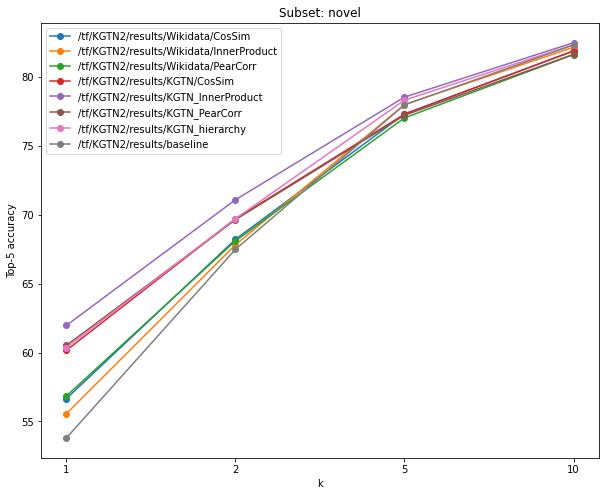

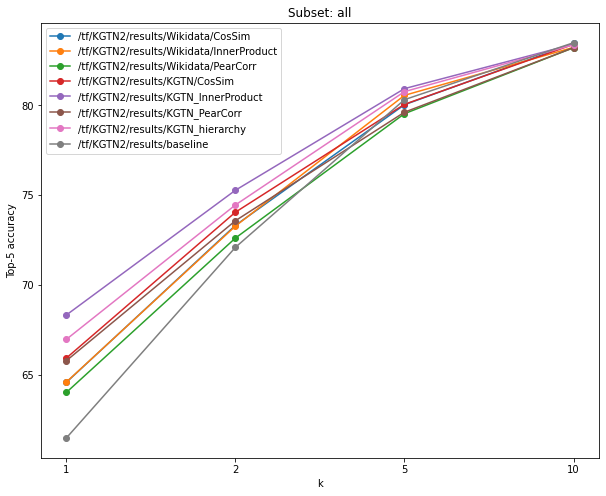

In [93]:

labels = ["1", "2", "5", "10"]

for current_type in ['novel', 'all']:
    plt.figure(figsize=(10,8))
    for x in df[df.type == current_type].iterrows():
        # print(x[1][:4].tolist())
        plt.plot(labels, x[1][:4].tolist(), marker='o', label=x[1]['label'])
        plt.legend()
        plt.title(f'Subset: {current_type}')
        plt.ylabel('Top-5 accuracy')
        plt.xlabel('k')

    plt.show()
